# K-Means Clustering

### Table of contents

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline

Read in normalised data

In [2]:
df = pd.read_csv('data/normalise.csv')
df=df.drop(["Unnamed: 0"], axis=1) # Drop Unnamed: 0 column
df.head()

,Total,No_participants,Amount_won,Amount_lost,1,2,3,4,Study_Type_Fridberg,Study_Type_Horstmann,Study_Type_Kjome,Study_Type_Maia,Study_Type_Premkumar,Study_Type_Steingroever2011,Study_Type_SteingroverInPrep,Study_Type_Wetzels,Study_Type_Wood,Study_Type_Worthy
0,0.675000,95,0.052910,0.880249,0.250000,0.062937,0.013423,0.525926,1,0,0,0,0,0,0,0,0,0
1,0.446875,95,0.206349,0.676516,0.500000,0.181818,0.073826,0.244444,1,0,0,0,0,0,0,0,0,0
2,0.437500,95,0.190476,0.681182,0.250000,0.244755,0.060403,0.281481,1,0,0,0,0,0,0,0,0,0
3,0.465625,95,0.179894,0.701400,0.229167,0.237762,0.073826,0.281481,1,0,0,0,0,0,0,0,0,0
4,0.543750,95,0.121693,0.774495,0.208333,0.167832,0.093960,0.340741,1,0,0,0,0,0,0,0,0,0


In [3]:
df.head()

,Total,No_participants,Amount_won,Amount_lost,1,2,3,4,Study_Type_Fridberg,Study_Type_Horstmann,Study_Type_Kjome,Study_Type_Maia,Study_Type_Premkumar,Study_Type_Steingroever2011,Study_Type_SteingroverInPrep,Study_Type_Wetzels,Study_Type_Wood,Study_Type_Worthy
0,0.675000,95,0.052910,0.880249,0.250000,0.062937,0.013423,0.525926,1,0,0,0,0,0,0,0,0,0
1,0.446875,95,0.206349,0.676516,0.500000,0.181818,0.073826,0.244444,1,0,0,0,0,0,0,0,0,0
2,0.437500,95,0.190476,0.681182,0.250000,0.244755,0.060403,0.281481,1,0,0,0,0,0,0,0,0,0
3,0.465625,95,0.179894,0.701400,0.229167,0.237762,0.073826,0.281481,1,0,0,0,0,0,0,0,0,0
4,0.543750,95,0.121693,0.774495,0.208333,0.167832,0.093960,0.340741,1,0,0,0,0,0,0,0,0,0


The first step of the clustering process is to determine a value for K. This can be done by:<br />
* **The Elbow Method**
* **Silhouette score**
* **SilhouetteVisualizer**

Three methods will be used to find the best value for K to use for clustering

### Methods for finding K Value

In [4]:
# Elbow(distortion and inertia) method and silhouette method

When the distortions are plotted and the plot looks like an arm then the [“elbow”](https://predictivehacks.com/k-means-elbow-method-code-for-python/)(the point of inflection on the curve) is the best value of k.

The formula for the Elbow method can be seen here:
    SSE = \sum_{i=1}^{N} {(y_i - ŷ_i)^2}

In [5]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

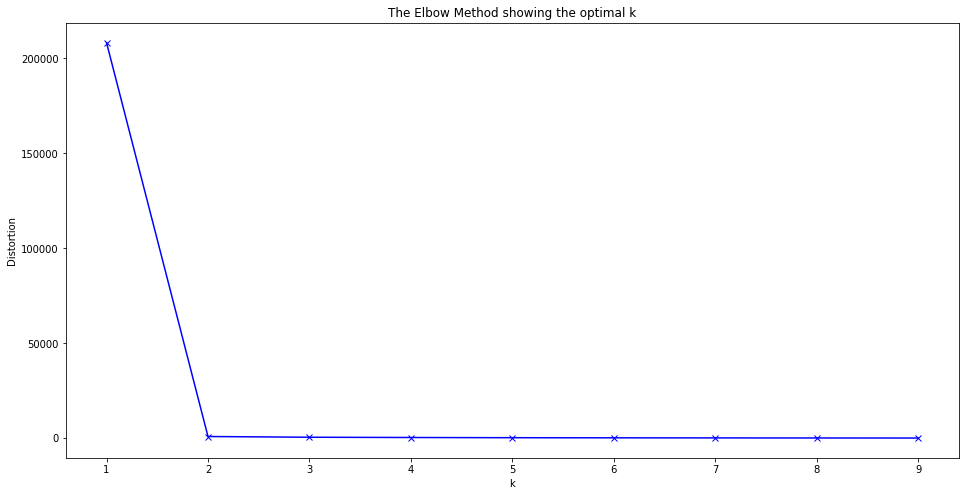

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

silhouette score is used to to measure the degree of seperation between clusters

In [8]:
for n in range(2, 11):
    km = KMeans(n_clusters=n)
#
# Fit the KMeans model
# Have to pick subset of columns as Study column is in string format
    km.fit_predict(df)
#
# Calculate Silhoutte Score
#
    score = silhouette_score(df, km.labels_, metric='euclidean')
#
# Print the score
#
    print('N = ' + str(n) + ' Silhouette Score: %.3f' % score)

N = 2 Silhouette Score: 0.972
N = 3 Silhouette Score: 0.802
N = 4 Silhouette Score: 0.486
N = 5 Silhouette Score: 0.613
N = 6 Silhouette Score: 0.679
N = 7 Silhouette Score: 0.615
N = 8 Silhouette Score: 0.658
N = 9 Silhouette Score: 0.695
N = 10 Silhouette Score: 0.721


Perform Comparative Analysis to Determine Best Value of K using Silhouette Plot

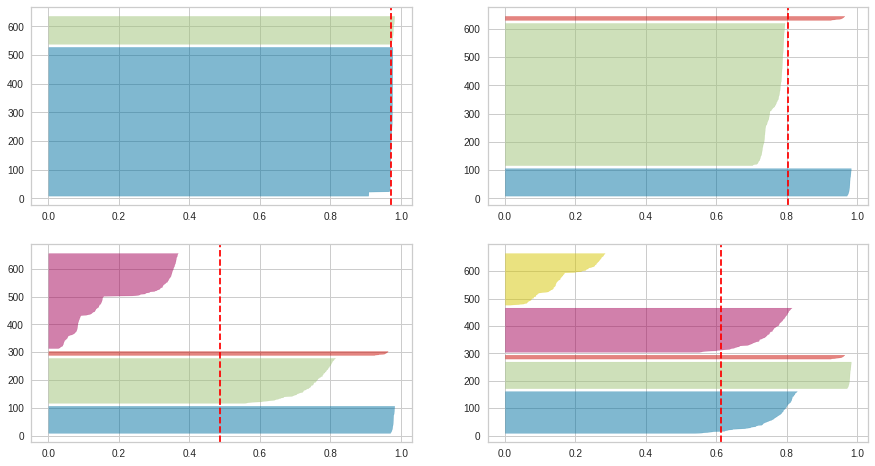

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

Add in formulas and explain why each value backs up using k=2

As it stands the best value for k is 2

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(50,50), hist_kwds=dict(bins=50), cmap="Set1")
plt.show()

Looking at this initial scatter matrix it is clear to see there is a lot of noise.

I will drop the study name columns to make findings more clear

In [ ]:
df.drop(columns=['No_participants', 'Study_Type_Fridberg', 'Study_Type_Horstmann', 'Study_Type_Kjome', 'Study_Type_Maia', 'Study_Type_Premkumar', 'Study_Type_Steingroever2011', 'Study_Type_SteingroverInPrep', 'Study_Type_Wetzels', 'Study_Type_Wood', 'Study_Type_Worthy'], inplace=True)

In [ ]:
df.head()

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,15), hist_kwds=dict(bins=50), cmap="Set1")
plt.show()

:::{note}
This correlation matrix is used to find highly correlated variables
:::

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Main Cluster Analysis